# Generate Predictions Images for a Site over Time
This notebook is used to generate predictions overlays for a given location.

Outputs are saved pngs where prediction score controls the opacity of a single-color image. The script also generates RGB patches for each prediction as well.

In [1]:
import os
import sys

import cv2
import matplotlib.pyplot as plt
from matplotlib import animation
import numpy as np
from tensorflow import keras
from tqdm import tqdm

sys.path.append('../')
from scripts.get_s2_data_ee import get_history, get_history_polygon, get_pixel_vectors

%load_ext autoreload
%autoreload 2

In [664]:
# Sentinel 2 band descriptions
band_descriptions = {
    'B1': 'Aerosols, 442nm',
    'B2': 'Blue, 492nm',
    'B3': 'Green, 559nm',
    'B4': 'Red, 665nm',
    'B5': 'Red Edge 1, 704nm',
    'B6': 'Red Edge 2, 739nm',
    'B7': 'Red Edge 3, 779nm',
    'B8': 'NIR, 833nm',
    'B8A': 'Red Edge 4, 864nm',
    'B9': 'Water Vapor, 943nm',
    'B11': 'SWIR 1, 1610nm',
    'B12': 'SWIR 2, 2186nm'
}

In [655]:
# Enter rect width in degrees (0.035 max recommended) and site coordinates
rect_width = 0.035
site_coords = [115.350242, -8.562121]
name = 'temesi'

In [656]:
patch_history = get_history([site_coords], 
                            [name], 
                            rect_width,
                            num_months = 58,
                            start_date = '2016-03-01')

  0%|          | 0/58 [00:00<?, ?it/s]

('Connection aborted.', ConnectionResetError(54, 'Connection reset by peer'))


  2%|▏         | 1/58 [00:07<07:25,  7.81s/it]

  3%|▎         | 2/58 [00:10<05:43,  6.14s/it]

  5%|▌         | 3/58 [00:16<05:41,  6.21s/it]

  7%|▋         | 4/58 [00:22<05:37,  6.24s/it]

  9%|▊         | 5/58 [00:25<04:42,  5.32s/it]

 10%|█         | 6/58 [00:29<04:10,  4.81s/it]

 12%|█▏        | 7/58 [00:33<03:48,  4.48s/it]

 14%|█▍        | 8/58 [00:36<03:27,  4.15s/it]

 16%|█▌        | 9/58 [00:39<03:06,  3.80s/it]

 17%|█▋        | 10/58 [00:41<02:39,  3.32s/it]

Image.select: Pattern 'B1' did not match any bands.
Image.select: Pattern 'B8' did not match any bands.
Image.select: Pattern 'B4' did not match any bands.
Image.select: Pattern 'B2' did not match any bands.
Image.select: Pattern 'B11' did not match any bands.
Image.select: Pattern 'B12' did not match any bands.


 19%|█▉        | 11/58 [00:42<02:06,  2.68s/it]

Image.select: Pattern 'B6' did not match any bands.Image.select: Pattern 'B9' did not match any bands.Image.select: Pattern 'B3' did not match any bands.Image.select: Pattern 'B8A' did not match any bands.
Image.select: Pattern 'B7' did not match any bands.


Image.select: Pattern 'B5' did not match any bands.



 21%|██        | 12/58 [00:46<02:14,  2.92s/it]

 22%|██▏       | 13/58 [00:49<02:18,  3.07s/it]

 24%|██▍       | 14/58 [00:55<02:48,  3.84s/it]

 26%|██▌       | 15/58 [01:01<03:19,  4.63s/it]

 28%|██▊       | 16/58 [01:06<03:12,  4.57s/it]

 29%|██▉       | 17/58 [01:11<03:09,  4.61s/it]

 31%|███       | 18/58 [01:15<03:03,  4.60s/it]

 33%|███▎      | 19/58 [01:19<02:51,  4.39s/it]

 34%|███▍      | 20/58 [01:26<03:11,  5.03s/it]

 36%|███▌      | 21/58 [01:30<03:02,  4.93s/it]

 38%|███▊      | 22/58 [01:36<03:08,  5.24s/it]

 40%|███▉      | 23/58 [01:38<02:28,  4.26s/it]

 41%|████▏     | 24/58 [01:47<03:14,  5.71s/it]

 43%|████▎     | 25/58 [01:50<02:40,  4.87s/it]

 45%|████▍     | 26/58 [01:54<02:26,  4.59s/it]

 47%|████▋     | 27/58 [01:57<02:08,  4.14s/it]

 48%|████▊     | 28/58 [02:02<02:07,  4.24s/it]

 50%|█████     | 29/58 [02:05<01:54,  3.94s/it]

 52%|█████▏    | 30/58 [02:08<01:43,  3.69s/it]

 53%|█████▎    | 31/58 [02:12<01:41,  3.77s/it]

 55%|█████▌    | 32/58 [02:16<01:38,  3.77s/it]

 57%|█████▋    | 33/58 [02:18<01:25,  3.43s/it]

 59%|█████▊    | 34/58 [02:22<01:19,  3.33s/it]

 60%|██████    | 35/58 [02:24<01:10,  3.08s/it]

 62%|██████▏   | 36/58 [02:32<01:37,  4.42s/it]

 64%|██████▍   | 37/58 [02:35<01:23,  3.97s/it]

 66%|██████▌   | 38/58 [02:38<01:16,  3.84s/it]

 67%|██████▋   | 39/58 [02:47<01:39,  5.25s/it]

 69%|██████▉   | 40/58 [02:51<01:31,  5.07s/it]

 71%|███████   | 41/58 [02:58<01:34,  5.53s/it]

 72%|███████▏  | 42/58 [03:02<01:19,  4.97s/it]

 74%|███████▍  | 43/58 [03:05<01:06,  4.46s/it]

 76%|███████▌  | 44/58 [03:08<00:57,  4.14s/it]

 78%|███████▊  | 45/58 [03:12<00:51,  3.93s/it]

 79%|███████▉  | 46/58 [03:15<00:43,  3.62s/it]

 81%|████████  | 47/58 [03:21<00:50,  4.58s/it]

 83%|████████▎ | 48/58 [03:28<00:50,  5.08s/it]

 84%|████████▍ | 49/58 [03:31<00:41,  4.61s/it]

 86%|████████▌ | 50/58 [03:35<00:34,  4.34s/it]

 88%|████████▊ | 51/58 [03:38<00:28,  4.08s/it]

 90%|████████▉ | 52/58 [03:41<00:22,  3.75s/it]

 91%|█████████▏| 53/58 [03:45<00:18,  3.79s/it]

 93%|█████████▎| 54/58 [03:48<00:14,  3.58s/it]

 95%|█████████▍| 55/58 [03:52<00:10,  3.61s/it]

 97%|█████████▋| 56/58 [04:00<00:10,  5.04s/it]

 98%|█████████▊| 57/58 [04:08<00:05,  5.81s/it]

100%|██████████| 58/58 [04:11<00:00,  4.34s/it]


## Generate Predictions

In [657]:
# Select model to load for predictions
model = keras.models.load_model('../models/65_mo_tpa_bootstrap_toa-12-20-2020.h5')

In [687]:
def normalize(array):
    return np.array(array) / 3000

def predict_time_series(patch_histories, site_name, model):
    rgb_stack = []
    preds_stack = []
    dates_list = []
    
    dates = list(patch_histories.keys())
    for date in tqdm(dates):
        rgb = np.stack((patch_histories[date][site_name]['B4'],
                        patch_histories[date][site_name]['B3'],
                        patch_histories[date][site_name]['B2']), axis=-1)
        
        width, height = rgb.shape[:2]
        pixel_vectors = []
        for i in range(width):
            for j in range(height):
                pixel_vector = []
                band_lengths = [len(patch_history[date][site_name][band]) for band in band_descriptions]
                if np.array(band_lengths).all() > 0:
                    for band in band_descriptions:
                        pixel_vector.append(patch_histories[date][site_name][band][i][j])
                    pixel_vectors.append(pixel_vector)
        
        pixel_vectors = normalize(pixel_vectors)
        if len(pixel_vectors) > 0 and np.median(rgb) > 0.1:
            rgb_stack.append(rgb / 3000)
            preds = model.predict(np.expand_dims(pixel_vectors, axis=-1))
            preds_img = np.reshape(preds, (width, height, 2))[:,:,1]
            preds_stack.append(preds_img)
            dates_list.append(date)
            
    return np.array(rgb_stack), np.array(preds_stack), dates_list

In [688]:
rgb_stack, preds_stack, dates_list = predict_time_series(patch_history, 'temesi', model)

100%|██████████| 58/58 [05:02<00:00,  5.22s/it]


In [689]:
def green_blue_swap(image):
    # to play nicely with OpenCV's BGR color order
    r,g,b = cv2.split(image)
    image[:,:,0] = b
    image[:,:,1] = g
    image[:,:,2] = r
    return image

In [690]:
def filter_small_points(image):
    # This is experimental. Filter out "hot pixel" predictions
    se1 = cv2.getStructuringElement(cv2.MORPH_RECT, (7,7))
    se2 = cv2.getStructuringElement(cv2.MORPH_RECT, (2,2))
    mask = cv2.morphologyEx(image, cv2.MORPH_CLOSE, se1)
    mask = cv2.morphologyEx(mask, cv2.MORPH_OPEN, se2)
    out = image * mask
    return out

In [691]:
def stretch_histogram(array, min_val, max_val):
    clipped = np.clip(array, min_val, max_val)
    stretched = (clipped - min_val) / (max_val - min_val)
    return stretched

In [692]:
rgb_stack[0].shape

(390, 390, 3)

### Evaluate histogram clipping, stretching, and gamma parameters

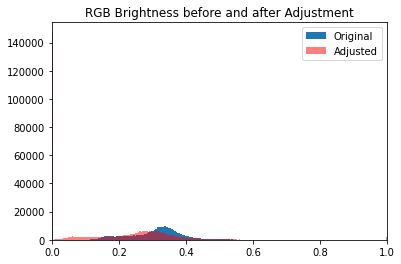

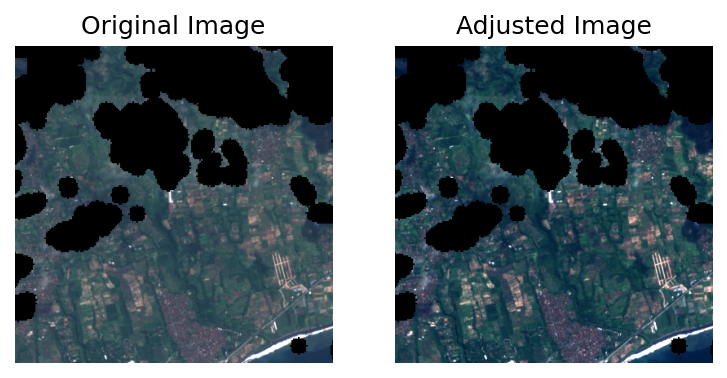

In [693]:
min_val = 0.1
max_val = 0.75
gamma = 1.2

original_image = rgb_stack[0]

edges, bins, patches = plt.hist(original_image.flatten(), 
                                bins=500, 
                                label='Original')

adjusted_image = stretch_histogram(original_image, min_val, max_val) ** gamma
plt.hist((adjusted_image).flatten(), 
         bins=bins, 
         alpha=0.5, 
         color='r',
         label='Adjusted')

plt.xlim([0, 1])
plt.legend()
plt.title('RGB Brightness before and after Adjustment')
plt.show()

plt.figure(dpi=150)
plt.subplot(1,2,1)
plt.imshow(np.clip(original_image, 0, 1), vmin=0, vmax=1)
plt.title('Original Image')
plt.axis('off')
plt.subplot(1,2,2)
plt.imshow(adjusted_image, vmin=0, vmax=1)
plt.title('Adjusted Image')
plt.axis('off')
plt.show()

### Save Images

In [694]:
threshold = 0.8
data_dir = os.path.join('figures/time_series/', name)
if not os.path.exists(data_dir):
    os.mkdir(data_dir)


for i, month in enumerate(dates_list):
    rgb_img = (stretch_histogram(rgb_stack[i], min_val, max_val)) ** gamma
    
    # if an image has too much cloud cover, the median rgb color will be low
    if np.median(rgb_img) > 0.1:
        bgr_img = green_blue_swap(rgb_img)
        width, height, channels = np.shape(bgr_img)
        pred_img = preds_stack[i]
        
        # points below threshold are set to black
        pred_img[pred_img < threshold] = 0
        filtered_preds = filter_small_points(pred_img)
        data = np.zeros((width, height, 4))
        
        # Create an array that is fully black. Set opacity to prediction value
        data[:,:,3] = 255 * filtered_preds
        
        cv2.imwrite(os.path.join(data_dir, f'{name}_pred_{month}_{rect_width}.png'), data)
        cv2.imwrite(os.path.join(data_dir, f'{name}_rgb_{month}_{rect_width}.png'), 255 * bgr_img)

## Generate Heatmap Contour

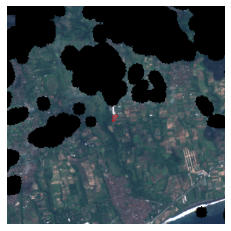

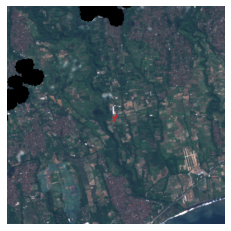

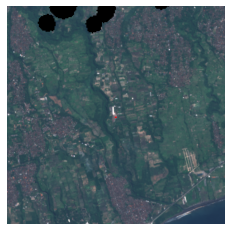

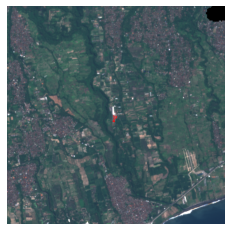

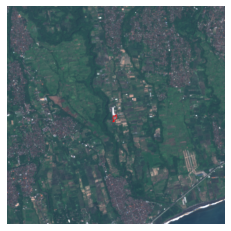

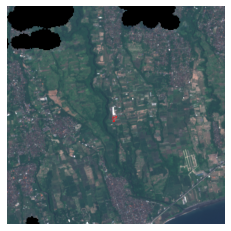

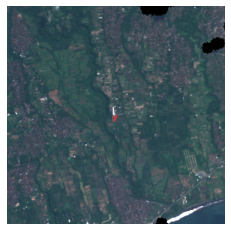

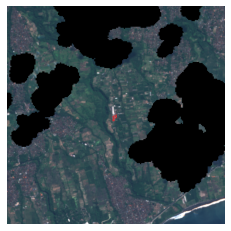

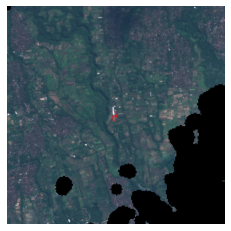

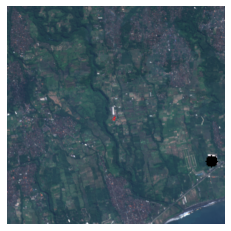

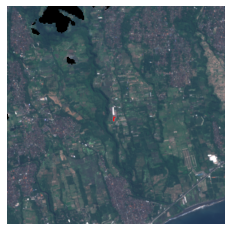

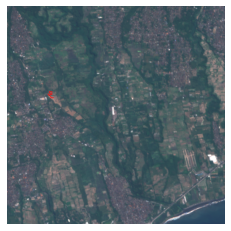

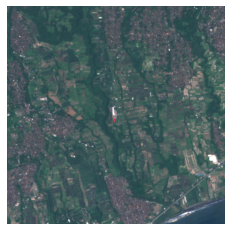

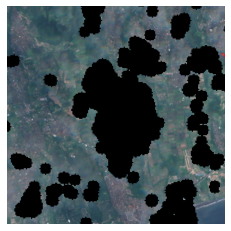

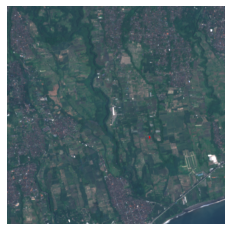

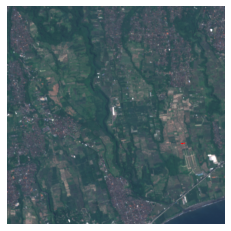

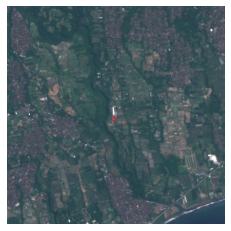

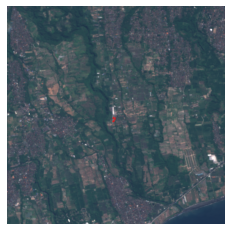

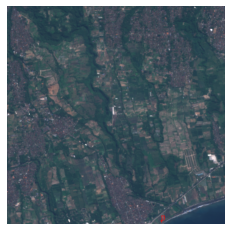

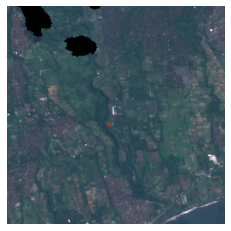

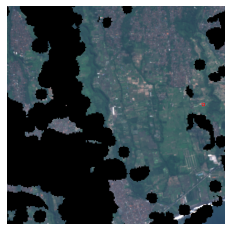

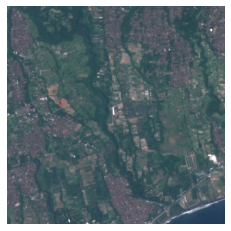

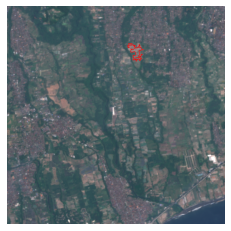

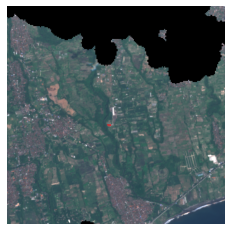

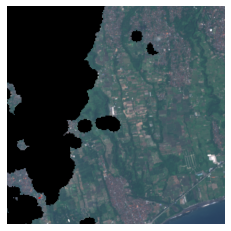

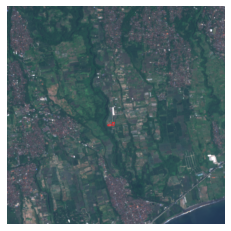

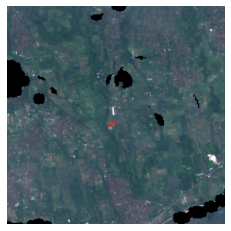

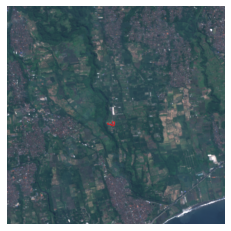

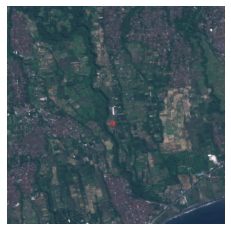

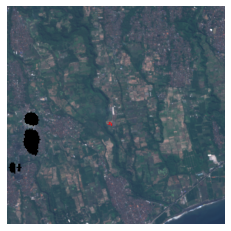

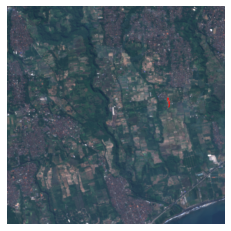

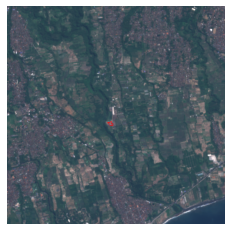

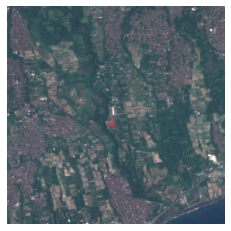

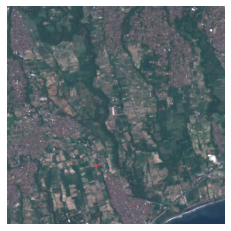

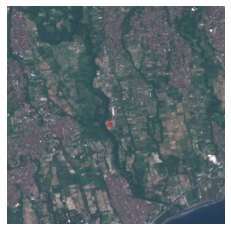

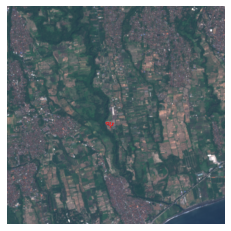

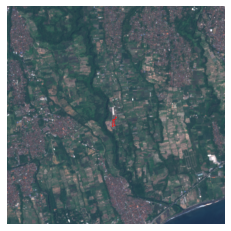

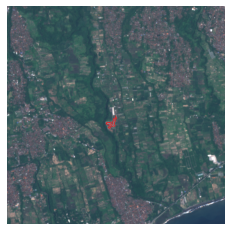

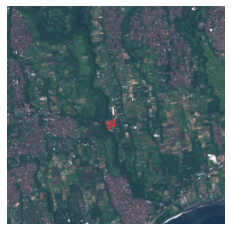

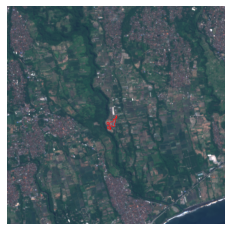

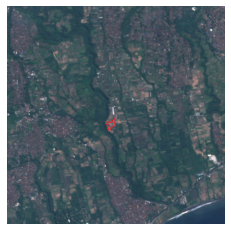

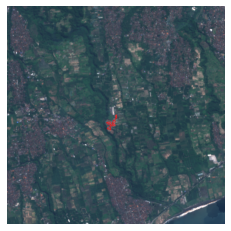

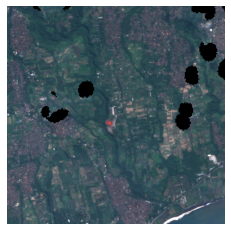

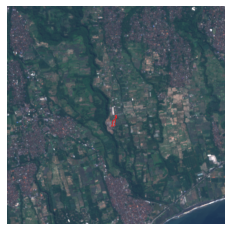

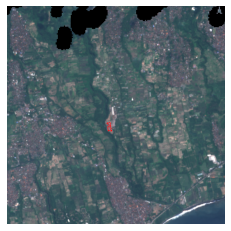

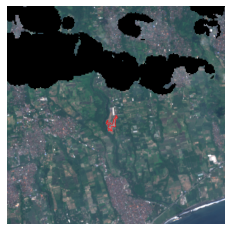

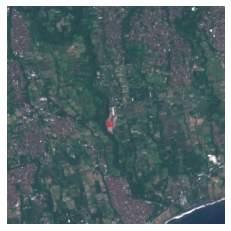

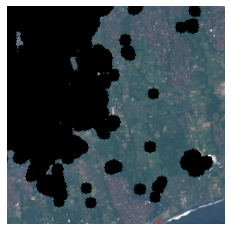

In [695]:
for pred, rgb in zip(preds_stack, rgb_stack):
    preds = (pred * 255).astype('uint8')
    ret, thresh = cv2.threshold(preds, 100, 255, 0)
    contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    largest_contours = sorted(contours, key=cv2.contourArea)[-1:]
    plt.imshow(cv2.drawContours(np.clip(rgb, 0, 1), largest_contours, -1, (1,0,0), 1))
    plt.axis('off')
    plt.show()

In [577]:
width, height = rgb_stack[0].shape[:2]
contour_coords = []
for point in largest_contours[0][:,0]:
    lon = site_coords[0] + (rect_width / width) * point[0]
    lat = site_coords[1] - (rect_width / height) * point[1]
    contour_coords.append([lon, lat])
contour_coords.append(contour_coords[0])
contour_coords.reverse()
geojson.Polygon(coordinates = [contour_coords])


{"coordinates": [[[115.352742, -8.564532], [115.352831, -8.564621], [115.352831, -8.564978], [115.352742, -8.565067], [115.352742, -8.565157], [115.352563, -8.565335], [115.352563, -8.56596], [115.352742, -8.566139], [115.353099, -8.566139], [115.353188, -8.56605], [115.353278, -8.56605], [115.353188, -8.56605], [115.353099, -8.566139], [115.35301, -8.566139], [115.352921, -8.566228], [115.352831, -8.566139], [115.352742, -8.566139], [115.352653, -8.56605], [115.352563, -8.566139], [115.352563, -8.566317], [115.352296, -8.566585], [115.352296, -8.566764], [115.352296, -8.566407], [115.352206, -8.566317], [115.352117, -8.566317], [115.351849, -8.566585], [115.351938, -8.566675], [115.352028, -8.566675], [115.352028, -8.566764], [115.351938, -8.566853], [115.352117, -8.567032], [115.352028, -8.566942], [115.351938, -8.567032], [115.351849, -8.566942], [115.35176, -8.567032], [115.351671, -8.567032], [115.35176, -8.566942], [115.351671, -8.566853], [115.351581, -8.566853], [115.351492, -8

In [ ]:
import rasterio as rs
warp.transform(rs.crs.CRS.from_epsg(3857), rs.crs.CRS.from_epsg(4326), [src_img.xy(x, y)[0]], [src_img.xy(x, y)[1]])

In [591]:
import ee
ee.Image.pixelCoordinates('EPSG:4326').getInfo()

{'type': 'Image',
 'bands': [{'id': 'x',
   'data_type': {'type': 'PixelType', 'precision': 'double'},
   'crs': 'EPSG:4326',
   'crs_transform': [1, 0, 0, 0, 1, 0]},
  {'id': 'y',
   'data_type': {'type': 'PixelType', 'precision': 'double'},
   'crs': 'EPSG:4326',
   'crs_transform': [1, 0, 0, 0, 1, 0]}]}

In [571]:
import geojson
geojson.Polygon(coordinates = [contour_coords])


{"coordinates": [[[115.352742, -8.55971], [115.352742, -8.55971], [115.352831, -8.559621], [115.352831, -8.559264], [115.352742, -8.559175], [115.352742, -8.559085], [115.352563, -8.558907], [115.352563, -8.558282], [115.352742, -8.558103], [115.353099, -8.558103], [115.353188, -8.558192], [115.353278, -8.558192], [115.353188, -8.558192], [115.353099, -8.558103], [115.35301, -8.558103], [115.352921, -8.558014], [115.352831, -8.558103], [115.352742, -8.558103], [115.352653, -8.558192], [115.352563, -8.558103], [115.352563, -8.557925], [115.352296, -8.557657], [115.352296, -8.557478], [115.352296, -8.557835], [115.352206, -8.557925], [115.352117, -8.557925], [115.351849, -8.557657], [115.351938, -8.557567], [115.352028, -8.557567], [115.352028, -8.557478], [115.351938, -8.557389], [115.352117, -8.55721], [115.352028, -8.5573], [115.351938, -8.55721], [115.351849, -8.5573], [115.35176, -8.55721], [115.351671, -8.55721], [115.35176, -8.5573], [115.351671, -8.557389], [115.351581, -8.557389

In [540]:
site_coords[0] + (rect_width / width) * largest_contours[0][:,0][0][0]

115.35274199999999

In [542]:
site_coords[1] + (rect_width / width) * largest_contours[0][:,0][0][1]

-8.559710285714285

In [538]:
(site_coords[0] - rect_width) + site_coords[0] 

173.020363

In [529]:
(site_coords[0] - rect_width) * width / 

115.345242